In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
T = 3
N = 1000
step = T / N
r = 0.02
SIGMA_0 = 30 / 100
S0 = 100

In [ ]:
t = np.linspace(0, T, N)

In [ ]:
def G(size):
    res = []
    for _ in range(size):
        res.append(np.random.normal())
    return res


def SIGMA(SIGMA_0, size, G):
    res = [SIGMA_0]
    for i in range(1, size):
        res.append(
            res[-1]
            + (1 / 100) * res[-1] * np.sqrt(step) * G[i - 1]
            - (1 / 100) * res[-1] * step
        )
    return res


def S_TILDE(S0, size, step, SIGMA, G1, G2):
    res = [S0]
    for i in range(1, size):
        res.append(
            res[-1]
            + SIGMA[i - 1] * res[-1] * np.sqrt(step) * G1[i - 1]
            + (5 / 100) * res[-1] * np.sqrt(step) * G2[i - 1]
        )
    return res


def S(S_TILDE):
    res = []
    for i in range(len(S_TILDE)):
        res.append(S_TILDE[i] * np.exp(r * T))
    return res


def SAMPLE_S():
    G1 = G(N)
    G2 = G(N)
    SIGMA_VAR = SIGMA(SIGMA_0, N, G1)
    S_TILDE_VAR = S_TILDE(S0, N, step, SIGMA_VAR, G1, G2)
    S_VAR = S(S_TILDE_VAR)
    return S_VAR

In [ ]:
def CIR_r(G2):
    k = 2 / 100
    tau = 2 / 100
    gamma = 2.5 / 100
    res = [1 / 100]
    for i in range(N):
        res.append(
            res[-1]
            + k * (tau - res[-1]) * step * res[-1]
            + gamma * np.sqrt(abs(res[-1])) * np.sqrt(step) * G2[i - 1]
        )
    return res


def S_CIR(S_TILDE, G2):
    res = []
    rt = CIR_r(G2)
    for i in range(len(S_TILDE)):
        res.append(S_TILDE[i] * np.exp(rt[i] * T))
    return res


def SAMPLE_S_CIR():
    G1 = G(N)
    G2 = G(N)
    SIGMA_VAR = SIGMA(SIGMA_0, N, G1)
    S_TILDE_VAR = S_TILDE(S0, N, step, SIGMA_VAR, G1, G2)
    S_VAR = S_CIR(S_TILDE_VAR, G2)
    res = {"s_var": S_VAR, "G2": G2}
    return res

**1 trajectoire**

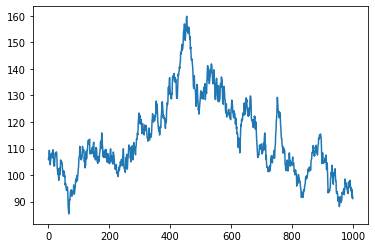

In [ ]:
S_VAR = SAMPLE_S()

plt.figure()
plt.plot(S_VAR)
plt.show()

**Plusieurs trajectoires**

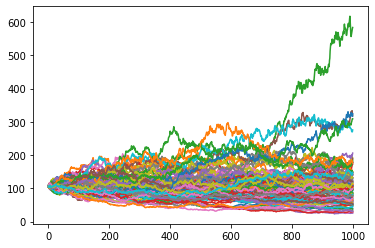

In [ ]:
plt.figure()
for _ in range(100):
    aux = SAMPLE_S()
    plt.plot(aux)
plt.show()

##**TAUX CONSTANT**

**Call Européen**

In [ ]:
K = np.linspace(10, 100, 10)
print("Call Européen:")
for strike in K:
    PAYOFF_ACT = []
    for j in range(500):
        ST = SAMPLE_S()[-1]
        payoff = max(0, ST - strike)
        PAYOFF_ACT.append(payoff / np.exp(r * T))
    V0 = np.mean(PAYOFF_ACT)
    print("strike = {};\t V0 = {}".format(strike, V0))

Call Européen:
strike = 10.0;	 V0 = 89.39049838735195
strike = 20.0;	 V0 = 84.77970990494886
strike = 30.0;	 V0 = 72.63469797173846
strike = 40.0;	 V0 = 68.10264622655647
strike = 50.0;	 V0 = 56.605964264698734
strike = 60.0;	 V0 = 46.62244050937034
strike = 70.0;	 V0 = 38.82565456492624
strike = 80.0;	 V0 = 29.907914228680877
strike = 90.0;	 V0 = 29.407267344768286
strike = 100.0;	 V0 = 25.891039639130177


**Option Asiatique**

In [ ]:
print("Option Asiatique:")
K = np.linspace(80, 140, 7)
for strike in K:
    PAYOFF_ACT = []
    for j in range(500):
        S_VAR = SAMPLE_S()
        payoff = max(0, strike - np.mean(S_VAR))
        PAYOFF_ACT.append(payoff / np.exp(r * T))
    V0 = np.mean(PAYOFF_ACT)
    print("strike = {};\t V0 = {}".format(strike, V0))

Option Asiatique:
strike = 80.0;	 V0 = 1.7699635093687944
strike = 90.0;	 V0 = 5.611592033652885
strike = 100.0;	 V0 = 9.704731128353718
strike = 110.0;	 V0 = 14.79220460364975
strike = 120.0;	 V0 = 21.394988581088313
strike = 130.0;	 V0 = 29.380659329456737
strike = 140.0;	 V0 = 33.74826325996047


**Produit 4**

In [ ]:
print("Produit 4:")
K = np.linspace(80, 140, 7)
for strike in K:
    PAYOFF_ACT = []
    for j in range(500):
        S_VAR = SAMPLE_S()
        payoff = max(0, S_VAR[-1] - S_VAR[int(np.ceil(T / 2))])
        PAYOFF_ACT.append(payoff / np.exp(r * T))
    V0 = np.mean(PAYOFF_ACT)
    print("strike = {};\t V0 = {}".format(strike, V0))

Produit 4:
strike = 80.0;	 V0 = 19.89589640776095
strike = 90.0;	 V0 = 19.908912541989288
strike = 100.0;	 V0 = 21.067622737267296
strike = 110.0;	 V0 = 19.386208081229693
strike = 120.0;	 V0 = 21.292279815109
strike = 130.0;	 V0 = 22.180849620234433
strike = 140.0;	 V0 = 22.305392389196438


##**TAUX CIR**

In [ ]:
print("Call Européeen (taux CIR):")
K = np.linspace(10, 100, 10)
for strike in K:
    PAYOFF_ACT = []
    for j in range(500):
        aux = SAMPLE_S_CIR()
        S_VAR = aux["s_var"]
        rt = CIR_r(aux["G2"])
        payoff = max(0, ST - strike)
        PAYOFF_ACT.append(payoff / np.exp(rt[j] * T))
    V0 = np.mean(PAYOFF_ACT)
    print("strike = {};\t V0 = {}".format(strike, V0))

Call Européeen (taux CIR):
strike = 10.0;	 V0 = 76.38647155275228
strike = 20.0;	 V0 = 66.68995738938008
strike = 30.0;	 V0 = 56.98114764247331
strike = 40.0;	 V0 = 47.260174041848934
strike = 50.0;	 V0 = 37.56407206815668
strike = 60.0;	 V0 = 27.85802612566795
strike = 70.0;	 V0 = 18.151299368731802
strike = 80.0;	 V0 = 8.44646442297329
strike = 90.0;	 V0 = 0.0
strike = 100.0;	 V0 = 0.0


In [ ]:
print("Option Asiatique (taux CIR):")
K = np.linspace(80, 140, 7)
for strike in K:
    PAYOFF_ACT = []
    for j in range(500):
        aux = SAMPLE_S_CIR()
        S_VAR = aux["s_var"]
        rt = CIR_r(aux["G2"])
        payoff = max(0, strike - np.mean(S_VAR))
        PAYOFF_ACT.append(payoff / np.exp(rt[j] * T))
    V0 = np.mean(PAYOFF_ACT)
    print("strike = {};\t V0 = {}".format(strike, V0))

Option Asiatique (taux CIR):
strike = 80.0;	 V0 = 2.9896316865658092
strike = 90.0;	 V0 = 6.160563181783788
strike = 100.0;	 V0 = 10.189133383038918
strike = 110.0;	 V0 = 16.555585487300988
strike = 120.0;	 V0 = 24.127389350986252
strike = 130.0;	 V0 = 31.837700367868162
strike = 140.0;	 V0 = 38.86242726590042


In [ ]:
print("Produit 4:")
K = np.linspace(80, 140, 7)
for strike in K:
    PAYOFF_ACT = []
    for j in range(500):
        aux = SAMPLE_S_CIR()
        S_VAR = aux["s_var"]
        rt = CIR_r(aux["G2"])
        payoff = max(0, S_VAR[-1] - S_VAR[int(np.ceil(T / 2))])
        PAYOFF_ACT.append(payoff / np.exp(rt[j] * T))
    V0 = np.mean(PAYOFF_ACT)
    print("strike = {};\t V0 = {}".format(strike, V0))

Produit 4:
strike = 80.0;	 V0 = 19.618363475236702
strike = 90.0;	 V0 = 20.844239255526855
strike = 100.0;	 V0 = 20.50955631205973
strike = 110.0;	 V0 = 19.803483536417993
strike = 120.0;	 V0 = 21.759264553100437
strike = 130.0;	 V0 = 18.878633468927543
strike = 140.0;	 V0 = 21.882374938800588
